# Bisection Method

The bisection method is what is known as a bracketing root finding method. To use this method the root must not be a turning point of $f$, or rather $f$ does not change sign as it passes through the root, and that there is only one root in the chosen interval.

The method can be summarized as:

- Start with a bracket $[x_L, x_R]$ around the root.
- Halve the bracket, introducing the midpoint $x_M$, giving you two brackets: $[x_L, x_M]$ and $[x_M, x_R]$
- Keep the bracket that contains the root and discard the one that doesn't
- Repeat the process until you are satisfied with the precision of your solution

Note that with this technique you end up with an interval that contains the root, rather than an approximation for the root itself. Also note that this method will always converge on a root if one exists in the interval.

## In Depth

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils import interval_plot, bisect_plot

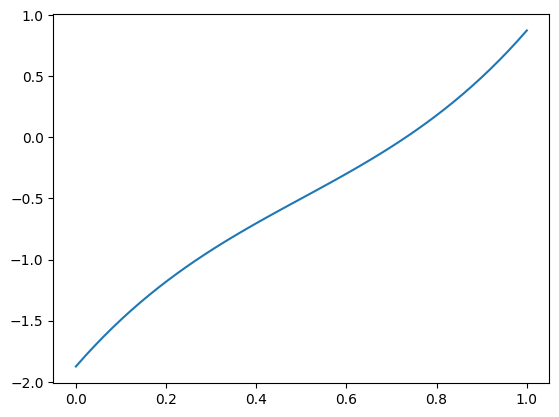

In [2]:
def f(x):
    return 3*(x- 0.5)**3 + 2*x - 1.5

x = np.linspace(0,1)

plt.plot(x, f(x))
plt.show()

Let's look at the steps of the method more in depth, starting with choosing our interval such that it contains the root:

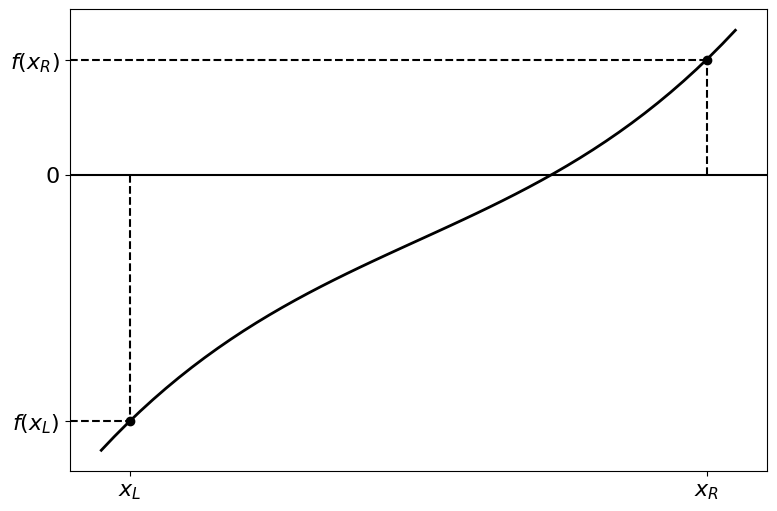

In [3]:
xlims = [-0.05, 1.05]

fig, ax = interval_plot(f, 0, 1, xlims)

plt.show()

We now divide the interval in half by intruding the midpoint $x_M = \tfrac{1}{2} (x_L + x_R)$ and calculating $f(x_M)$:

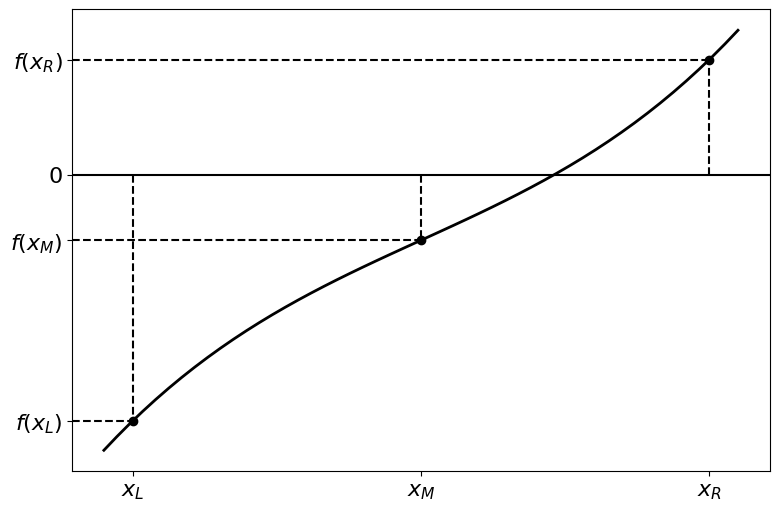

In [4]:
fig, ax = bisect_plot(f, 0, 1, xlims)

plt.show()

Now we need to figure out which interval contains the root. We can do this by checking if the function value changes signs at the ends of the interval, i.e. which of $f(x_L)$ and $f(x_R)$ is the opposite sign of $f(x_M)$? An easy way to check this is to check if the product of $f(x_L) \times f(x_M)$ or $f(x_M) \times f(x_R)$ is negative. If the product is negative then the sign has changed in that interval and it is the one we choose. 

In the figure above, the right interval $[x_M, x_R]$ contains the root.

If we want a more precise answer we can keep applying this technique to our chosen interval. Each time we are left with an interval that was half as big as the last, improving the precision of our solution.

Subsequent iterations of the bisection method are illustrated in the figures below.

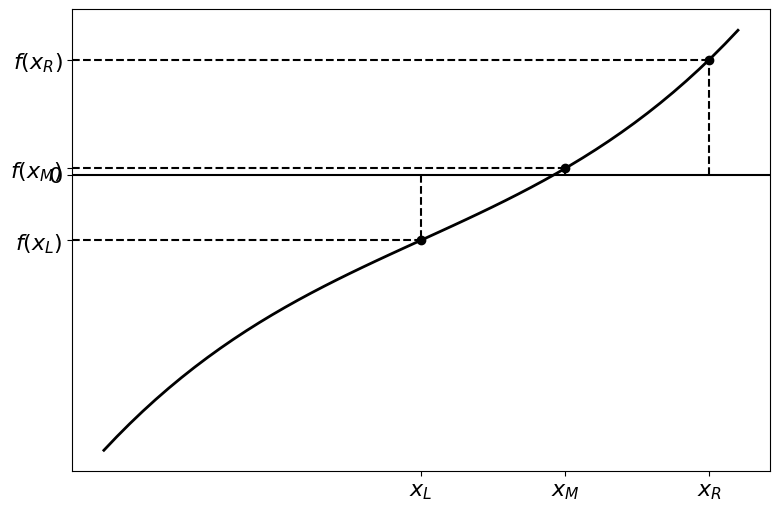

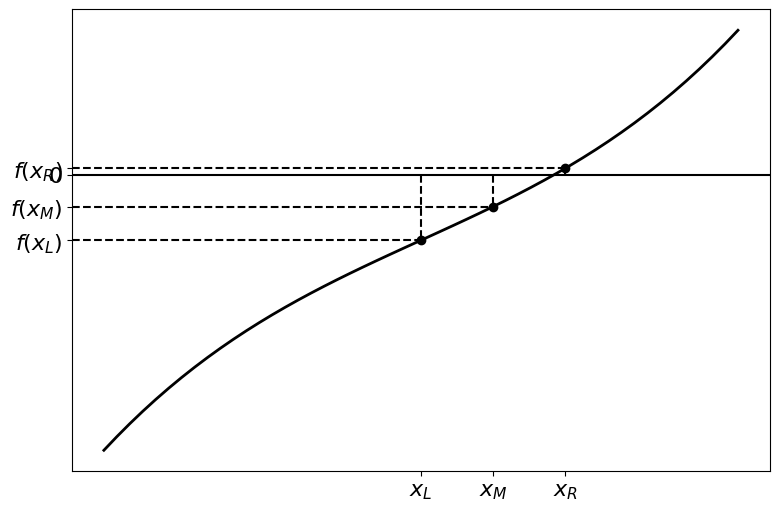

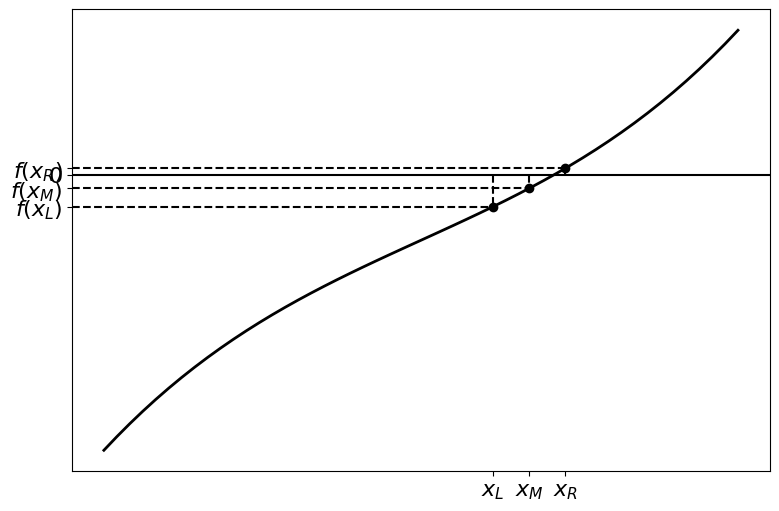

In [5]:
N = 3

figs = [None]*N
axs = [None]*N

xl = 0
xr = 1
xm = 0.5

fl = f(xl)
fr = f(xr)
fm = f(xm)

for i in range(N):
    #Bisection
    xm = 0.5*(xl + xr)
    fm = f(xm)
    
    if fl*fm < 0:
        xr = xm
        fr = fm
    else:
        xl = xm
        fl = fm
    
    #Plot
    figs[i], axs[i] = bisect_plot(f, xl, xr, xlims)

plt.show()

## Precision of The Result


The error of our solution is the size of the last interval. Because the length of our interval is halved every step, we can calculate how many steps are needed to achieve a particular accuracy, given the length of our initial interval. After the first step the error is ${|b - a|}/{2}$ and after the $n$-th step the error is ${|b-a|}/{2^n}$. Thus, for a specified tolerance, the number of steps required is:


\begin{align*}
\text{tolerance} &= \frac{|b-a|}{2^n}\\
\therefore 2^n &= \frac{|b -a|}{\text{tolerance}} \\
\therefore n &= \log_2 \left(\frac{|b-a|}{\text{tolerance}}\right) \\
\end{align*}


This value is rounded up to an integer.

As we know the number of iterations required to reach a given tolerance, we can use a `for` loop instead of a `while` loop (though both are perfectly acceptable). Note that the number of iterations depends on the size of the starting interval, so it helps to narrow this down before relying on the root finding technique.